<a href="https://colab.research.google.com/github/fvillena/patrones/blob/main/2-dimensionality_reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reducción de dimensionalidad

In [1]:
import numpy as np
import pandas as pd
import sklearn.decomposition # Módulo donde encontramos el análisis de componentes principales
import sklearn.manifold # Módulo donde encontramos el método t-Distributed Stochastic Neighbor Embedding
import matplotlib.pyplot as plt

Esta tarea de aprendizaje no supervisado nos permite disminuir la cantidad de variables de un conjunto de datos intentando no perder información del espacio original

Importamos un conjunto de puntos organizados sobre una linea de inclinación de 30°

## Análisis de componentes principales

In [2]:
line = pd.read_csv("https://raw.githubusercontent.com/fvillena/mlb/master/data/line.csv")
line.head()

,x,y
0,-0.143944,-0.083106
1,0.644160,0.371906
2,0.466565,0.269372
3,0.054760,0.031616
4,-0.309486,-0.178682


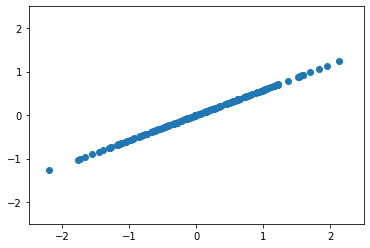

In [3]:
plt.scatter(line.x,line.y)
plt.ylim([-2.5,2.5])
plt.xlim([-2.5,2.5])
plt.show()

Ajustamos análisis de componentes principales

In [4]:
pca_line = sklearn.decomposition.PCA() # Instanciamos PCA
pca_line.fit(line) # Ajustamos el análisis

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

Al tener nuestro método ajustado podemos obtener los componentes (vectores propios) de nuestro análisis. Se puede observar que el valor absoluto del primer componente es el mayor, debido a que la mayor parte de nuestro conjunto de datos original se encuenta proyectado sobre el el primer componente principal.

In [5]:
pca_line.components_ # Componentes de nuesto PCA

array([[-0.8660254, -0.5      ],
       [-0.5      ,  0.8660254]])

Al visualizar los componentes sobre nuestro espacio original se puede observar que el primer componente principal se sitúa precisamente sobe nuestra linea de puntos. El segundo componente principal es despreciable debido a que su varianza explicada es mínima.

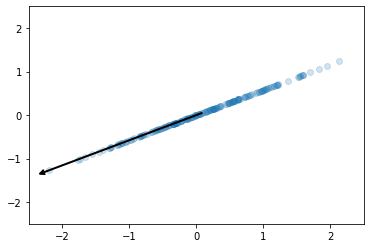

In [6]:
plt.scatter(line.x,line.y, alpha=0.2)
plt.ylim([-2.5,2.5])
plt.xlim([-2.5,2.5])
for length, vector in zip(pca_line.explained_variance_, pca_line.components_):
    ax=plt.gca()
    v = vector * 3 * np.sqrt(length)
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', pca_line.mean_ + v, pca_line.mean_, arrowprops=arrowprops)

Ahora importamos exactamente la misma linea anterior, pero a esta se le agregó ruido.

In [7]:
line_noised = pd.read_csv("https://raw.githubusercontent.com/fvillena/mlb/master/data/line_noised.csv")
line_noised.head()

,x,y
0,-0.159395,-0.056345
1,0.673869,0.320449
2,0.484614,0.238111
3,0.120637,-0.082488
4,-0.228911,-0.318242


Ahora contamos con nuestra nube de puntos, pero hay que notar que tiene exactamente la misma inclinación que el caso anterior

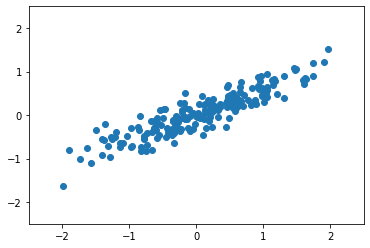

In [8]:
plt.scatter(line_noised.x,line_noised.y)
plt.ylim([-2.5,2.5])
plt.xlim([-2.5,2.5])
plt.show()

## Actividad 1:

Ajuste un análisis de componentes principales sobre los datos de la línea con ruido, extraiga los vectores propios calculados y visualice los 2 componentes principales sobre sus datos.

In [41]:
# ¡Prográmame!

pca_line_noised = None # Acá situa tu objeto del PCA

In [42]:
# Usa esta función si quieres visualizar los componentes principales sobre sus datos.
def plot_data_with_pca(data,pca_object):
  """
  Esta función recibe una matriz bidimensional y un objeto de análisis de 
  componentes principales y imprime un gráfico de dispersión de los datos 
  entregados con los componentes principales
  """
  plt.scatter(data.x,data.y, alpha=0.2)
  plt.ylim([-2.5,2.5])
  plt.xlim([-2.5,2.5])
  for length, vector in zip(pca_object.explained_variance_, pca_object.components_):
      v = vector * 3 * np.sqrt(length)
      ax=plt.gca()
      arrowprops=dict(arrowstyle='->',
                      linewidth=2,
                      shrinkA=0, shrinkB=0)
      ax.annotate('', pca_object.mean_ + v, pca_object.mean_, arrowprops=arrowprops)
  plt.show()

## Actividad 2:

Proyecte sus datos de la línea ruidosa sobre el primer componente principal y responda las siguientes preguntas:


*   ¿Cuáles son las coordenadas del elemento 10 del la línea ruidosa?
*   ¿Cuál es la coordenada del elemento 10 del la línea ruidosa proyectada sobre el primer componente principal?
*   ¿Cuántas componentes PCA es posible calcular para el conjunto de datos?
*   ¿Qué podría concluir tomando en cuenta la comparación de las coordenadas en el espacio original y el espacio proyectado respecto a la utilidad de PCA para reducir dimensionalidad?



## MNIST

MNIST es un conjunto de datos de imágenes de números manuscritos. Cada fila del conjunto de datos contiene los 64 pixeles de cada imagen junto con el número al cual pertenece.

In [43]:
mnist = pd.read_csv("https://raw.githubusercontent.com/fvillena/mlb/master/data/mnist.csv")
mnist.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,pixel_1_2,pixel_1_3,pixel_1_4,pixel_1_5,pixel_1_6,pixel_1_7,pixel_2_0,pixel_2_1,pixel_2_2,pixel_2_3,pixel_2_4,pixel_2_5,pixel_2_6,pixel_2_7,pixel_3_0,pixel_3_1,pixel_3_2,pixel_3_3,pixel_3_4,pixel_3_5,pixel_3_6,pixel_3_7,pixel_4_0,pixel_4_1,pixel_4_2,pixel_4_3,pixel_4_4,pixel_4_5,pixel_4_6,pixel_4_7,pixel_5_0,pixel_5_1,pixel_5_2,pixel_5_3,pixel_5_4,pixel_5_5,pixel_5_6,pixel_5_7,pixel_6_0,pixel_6_1,pixel_6_2,pixel_6_3,pixel_6_4,pixel_6_5,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,label
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,13.0,15.0,10.0,15.0,5.0,0.0,0.0,3.0,15.0,2.0,0.0,11.0,8.0,0.0,0.0,4.0,12.0,0.0,0.0,8.0,8.0,0.0,0.0,5.0,8.0,0.0,0.0,9.0,8.0,0.0,0.0,4.0,11.0,0.0,1.0,12.0,7.0,0.0,0.0,2.0,14.0,5.0,10.0,12.0,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,9.0,0.0,0.0,0.0,0.0,3.0,15.0,16.0,6.0,0.0,0.0,0.0,7.0,15.0,16.0,16.0,2.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,3.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,3.0,16.0,15.0,14.0,0.0,0.0,0.0,0.0,8.0,13.0,8.0,16.0,0.0,0.0,0.0,0.0,1.0,6.0,15.0,11.0,0.0,0.0,0.0,1.0,8.0,13.0,15.0,1.0,0.0,0.0,0.0,9.0,16.0,16.0,5.0,0.0,0.0,0.0,0.0,3.0,13.0,16.0,16.0,11.0,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,13.0,6.0,15.0,4.0,0.0,0.0,0.0,2.0,1.0,13.0,13.0,0.0,0.0,0.0,0.0,0.0,2.0,15.0,11.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,12.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,8.0,0.0,0.0,0.0,8.0,4.0,5.0,14.0,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,8.0,0.0,0.0,0.0,0.0,0.0,1.0,13.0,6.0,2.0,2.0,0.0,0.0,0.0,7.0,15.0,0.0,9.0,8.0,0.0,0.0,5.0,16.0,10.0,0.0,16.0,6.0,0.0,0.0,4.0,15.0,16.0,13.0,16.0,1.0,0.0,0.0,0.0,0.0,3.0,15.0,10.0,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


El conjunto de datos contiene 1797 imágenes y 65 atributos (pixeles + etiqueta)

In [21]:
mnist.shape

(1797, 65)

Así se ve el conjunto de datos.

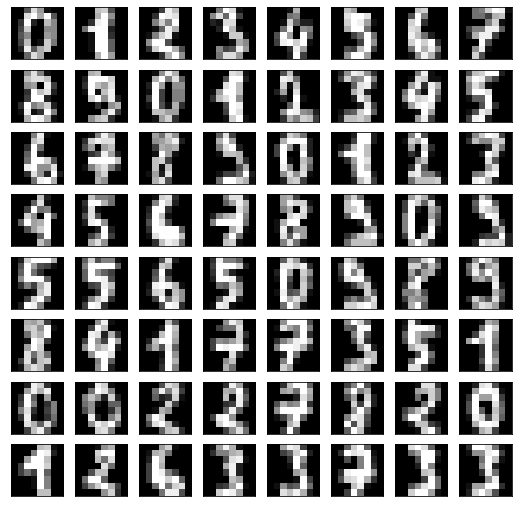

In [22]:
fig,axs = plt.subplots(8,8,figsize=(9, 9),subplot_kw={'xticks':[], 'yticks':[]})

for i,ax in enumerate(axs.flat):
    ax.imshow(
        mnist.iloc[i,:-1].values.reshape(8,-1),
        cmap="gray"
    )

Ajustemos un PCA sobre el conjunto de datos.

In [23]:
pca_mnist = sklearn.decomposition.PCA()
pca_mnist.fit(mnist.iloc[:,:-1])

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

Obtenemos una matriz con 64 componentes.

In [24]:
pca_mnist.components_.shape

(64, 64)

Así se ve el primer componente.

In [25]:
pca_mnist.components_[0]

array([-1.77484909e-19, -1.73094651e-02, -2.23428835e-01, -1.35913304e-01,
       -3.30323092e-02, -9.66340844e-02, -8.32943805e-03,  2.26900082e-03,
       -3.20516495e-04, -1.19308905e-01, -2.44451676e-01,  1.48512745e-01,
       -4.67319410e-02, -2.17740744e-01, -1.48136776e-02,  4.47779518e-03,
       -4.94136398e-05, -7.95419375e-02,  8.33951454e-02,  2.15915342e-01,
       -1.72126801e-01, -1.63712098e-01,  2.86444452e-02,  4.23251803e-03,
        9.85488574e-05,  6.42319144e-02,  2.54093316e-01, -3.56771026e-02,
       -2.09462569e-01, -4.31311420e-02,  5.13118688e-02,  2.13422732e-04,
       -0.00000000e+00,  1.59950883e-01,  3.68690774e-01,  1.64406827e-01,
        8.52007908e-02,  3.72982855e-02,  2.15866980e-02, -0.00000000e+00,
        1.28865585e-03,  1.06945287e-01,  3.03067457e-01,  2.47813041e-01,
        2.09637296e-01,  1.22325219e-02, -3.69458497e-02,  1.61485028e-03,
        6.93023548e-04, -8.35144239e-03, -5.58598986e-02,  9.30534169e-02,
        1.07387720e-01, -

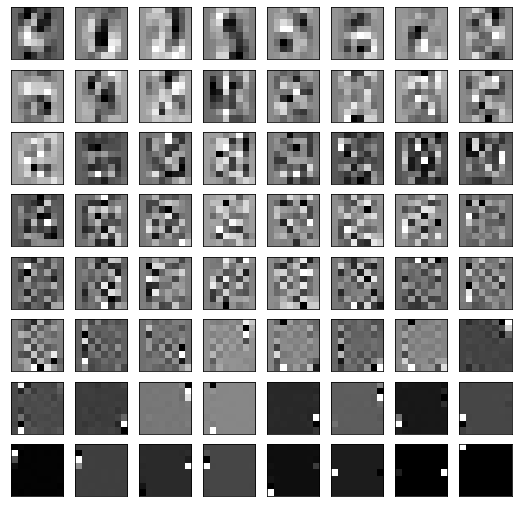

In [26]:
fig,axs = plt.subplots(8,8,figsize=(9, 9),subplot_kw={'xticks':[], 'yticks':[]})

for i,ax in enumerate(axs.flat):
    ax.imshow(
        pca_mnist.components_[i].reshape(8,-1),
        cmap="gray"
    )

Acá podemos ver cuánta varianza explica cada uno de los 64 componentes.

In [27]:
pca_mnist.explained_variance_ratio_

array([1.48905936e-01, 1.36187712e-01, 1.17945938e-01, 8.40997942e-02,
       5.78241466e-02, 4.91691032e-02, 4.31598701e-02, 3.66137258e-02,
       3.35324810e-02, 3.07880621e-02, 2.37234084e-02, 2.27269657e-02,
       1.82186331e-02, 1.77385494e-02, 1.46710109e-02, 1.40971560e-02,
       1.31858920e-02, 1.24813782e-02, 1.01771796e-02, 9.05617439e-03,
       8.89538461e-03, 7.97123157e-03, 7.67493255e-03, 7.22903569e-03,
       6.95888851e-03, 5.96081458e-03, 5.75614688e-03, 5.15157582e-03,
       4.89539777e-03, 4.28887968e-03, 3.73606048e-03, 3.53274223e-03,
       3.36683986e-03, 3.28029851e-03, 3.08320884e-03, 2.93778629e-03,
       2.56588609e-03, 2.27742397e-03, 2.22277922e-03, 2.11430393e-03,
       1.89909062e-03, 1.58652907e-03, 1.51159934e-03, 1.40578764e-03,
       1.16622290e-03, 1.07492521e-03, 9.64053065e-04, 7.74630271e-04,
       5.57211553e-04, 4.04330693e-04, 2.09916327e-04, 8.24797098e-05,
       5.25149980e-05, 5.05243719e-05, 3.29961363e-05, 1.24365445e-05,
      

Visualizamos la suma acumulada de las varianzas explicadas por cada componente.

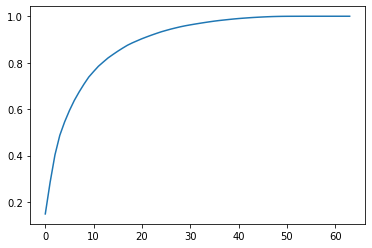

In [28]:
plt.plot(
    range(len(pca_mnist.explained_variance_ratio_)),
    np.cumsum(pca_mnist.explained_variance_ratio_)
)

Ajustemos un PCA de sólo 2 componentes para visualizar el conjunto de datos en un gráfico de dispersión.

In [29]:
pca_mnist_2d = sklearn.decomposition.PCA(2)
mnist_2d=pca_mnist_2d.fit_transform(mnist.iloc[:,:-1])
mnist_2d.shape

(1797, 2)

Cada uno de los números tienden a acumularse juntos

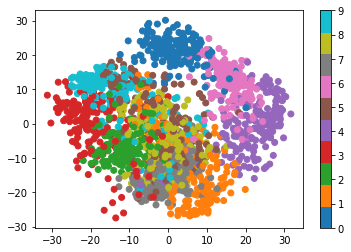

In [30]:
plt.scatter(
    mnist_2d[:,0],
    mnist_2d[:,1],
    c=mnist.label,
    cmap='tab10'
)
plt.colorbar()

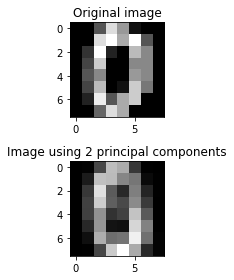

In [31]:
fig, axs = plt.subplots(2)

axs[0].imshow(
    mnist.iloc[0,:-1].values.reshape(8,-1),
    cmap="gray"
)
axs[0].set_title("Original image")

axs[1].imshow(
    pca_mnist_2d.inverse_transform(mnist_2d)[0].reshape(8,-1),
    cmap="gray"
)
axs[1].set_title("Image using 2 principal components")
fig.tight_layout()

## Actividad 3

Ajusta un PCA cuyos componentes principales expliquen el 95% de la varianza del conjunto de datos. ¿Cuántos componentes fueron necesarios?, ¿Cómo se ve la imagen de un número al usar ese número de componentes principales?

In [32]:
# TODO: Ajuste y visualización de un PCA que explique el 95% de la varianza del conjunto de datos
# HINT:
pca = sklearn.decomposition.PCA(0.95)

## t-distributed stochastic neighbor embedding

Sklearn en la clase sklearn.manifold.TSNE implementa este método y la forma de utilización es exactamente igual al PCA.

Ajustamos un ebmedding de 2 dimensiones para visualización.

In [33]:
tsne_mnist_2d = sklearn.manifold.TSNE(2)
mnist_2d_tsne=tsne_mnist_2d.fit_transform(mnist.iloc[:,:-1])
mnist_2d_tsne.shape

(1797, 2)

Este método agrupa de mucho mejor manera los números del conjunto de datos MNIST.

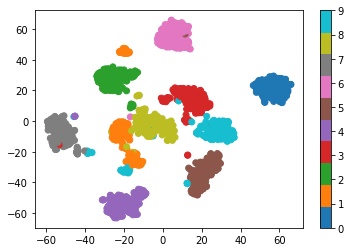

In [34]:
plt.scatter(
    mnist_2d_tsne[:,0],
    mnist_2d_tsne[:,1],
    c=mnist.label,
    cmap='tab10'
)
plt.colorbar()
plt.show()

## Reducción de dimensionalidad de datos de microarray

In [35]:
microarray = pd.read_csv("https://raw.githubusercontent.com/fvillena/mlb/master/data/gene_expressions.tsv", sep="\t", index_col="gene").transpose()

In [36]:
microarray

gene,A1BG,A2M,A2ML1,A4GALT,AAAS,AACS,AADAC,AAED1,AAGAB,AAMP,AAR2,AARS,AARS2,AASDH,AASDHPPT,AATK,ABAT,ABCA2,ABCA3,ABCA6,ABCA7,ABCA8,ABCA9,ABCB10,ABCB11,ABCB8,ABCC1,ABCC10,ABCC11,ABCC5,ABCC6,ABCC8,ABCD1,ABCD3,ABCD4,ABCE1,ABCF1,ABCF2,ABCF3,ABCG4,...,ZNF99,ZNFX1,ZNHIT1,ZNHIT6,ZNRD1,ZNRF2,ZNRF4,ZP1,ZP2,ZP4,ZRANB1,ZRANB2,ZSCAN1,ZSCAN12,ZSCAN16,ZSCAN18,ZSCAN2,ZSCAN20,ZSCAN21,ZSCAN22,ZSCAN25,ZSCAN26,ZSCAN29,ZSCAN30,ZSCAN31,ZSCAN4,ZSCAN9,ZSWIM1,ZSWIM3,ZSWIM4,ZSWIM7,ZSWIM8,ZUFSP,ZW10,ZWILCH,ZXDA,ZXDB,ZXDC,ZYG11B,ZZZ3
786-0,-1.025477,-1.409323,-1.696062,1.978677,0.878385,-0.354923,-0.809323,1.419631,0.369015,-0.128523,0.043877,0.603108,0.741938,-0.170415,1.164492,-0.333662,-1.599538,0.974554,1.113231,-0.505369,-0.438,-0.446723,-0.252831,-0.521846,-0.203754,0.647923,0.058354,-0.0572,-0.281477,-1.025215,-0.581538,-0.227877,0.374277,0.607862,0.211785,0.511046,1.282877,1.041969,0.356646,-0.0932,...,-0.0454,0.996477,-0.148385,1.189677,-0.5214,-0.560431,-0.005215,0.517415,-0.075554,-0.029985,-0.041369,1.0474,-0.106554,0.937908,-0.333785,0.879354,0.410138,-0.024492,0.102277,-0.195292,0.307738,-0.141754,-0.007338,-0.090585,-0.508862,-0.088231,0.211123,-0.041738,-0.967369,0.632138,0.266154,0.002246,0.482123,0.605908,2.007554,-0.359754,-0.193538,-0.565677,-0.243108,0.456292
A498,-0.925477,-1.409323,-1.686062,1.588677,0.178385,-0.184923,-0.389323,1.779631,0.249015,-0.198523,-0.386123,-0.136892,0.701938,-0.570415,0.804492,-0.323662,-1.379538,1.214554,1.923231,-0.445369,0.832,-0.446723,-0.252831,0.628154,-0.203754,0.777923,1.138354,-0.3572,-0.291477,-0.535215,0.238462,-0.227877,1.114277,0.357862,-0.378215,0.441046,0.392877,1.101969,-0.013354,-0.1632,...,-0.1054,0.626477,1.251615,0.189677,-0.7914,-0.240431,-0.005215,1.207415,-0.075554,-0.029985,-0.881369,0.7974,-0.106554,-1.242092,-0.653785,0.069354,-0.359862,-0.004492,-0.377723,-0.115292,0.467738,-0.181754,0.072662,-0.430585,0.461138,-0.088231,-0.098877,-0.051738,-0.407369,1.272138,0.106154,0.042246,0.092123,-0.384092,1.227554,0.770246,0.386462,-0.705677,-0.233108,-0.113708
A549,0.274523,-1.409323,-1.686062,0.908677,1.658385,-0.074923,0.880677,0.809631,0.649015,0.381477,0.243877,1.373108,0.131938,-0.410415,0.984492,-0.333662,-1.849538,0.574554,1.963231,-0.505369,-0.108,-0.416723,-0.252831,0.908154,-0.163754,0.547923,2.258354,-0.5472,-0.271477,-1.535215,-0.701538,0.562123,-1.215723,0.687862,-0.328215,0.991046,1.012877,1.271969,-0.043354,-0.1332,...,-0.1054,-0.003523,-0.598385,0.359677,-0.4114,-0.620431,-0.005215,-0.202585,-0.075554,-0.029985,-0.321369,-0.2726,-0.106554,0.287908,-0.233785,-0.900646,0.880138,-0.254492,0.542277,0.014708,0.167738,-0.541754,0.012662,-1.410585,-0.978862,-0.088231,-0.308877,0.178262,-0.887369,0.142138,0.366154,-0.627754,-0.047877,0.405908,2.227554,0.040246,0.616462,-0.775677,-0.243108,-0.433708
ACHN,-0.875477,-1.409323,-1.686062,0.348677,-0.291615,-0.014923,-0.809323,1.179631,-0.500985,-1.038523,-1.556123,0.373108,-0.298062,-0.180415,0.504492,-0.323662,-1.769538,-0.455446,1.743231,-0.505369,-0.858,-0.446723,-0.222831,-0.261846,-0.203754,0.087923,0.488354,-0.5072,-0.211477,-0.625215,1.098462,-0.227877,-1.575723,-0.592138,-0.018215,0.191046,-0.587123,-0.198031,-1.413354,-0.1632,...,-0.0954,-0.633523,1.081615,0.299677,-0.6114,-0.680431,-0.005215,-0.202585,-0.075554,-0.029985,-0.901369,0.2874,-0.106554,0.307908,-0.133785,-0.940646,-0.629862,-0.254492,-0.427723,-0.345292,0.427738,-0.851754,-0.197338,0.199415,-1.218862,-0.088231,-0.098877,-1.321738,-0.837369,-0.757862,0.266154,0.092246,0.192123,-0.854092,0.947554,-0.259754,-0.533538,-1.125677,-1.633108,-0.203708
BT-549,2.484523,-1.409323,-1.696062,1.098677,-0.011615,-2.114923,-0.809323,1.379631,-0.630985,-1.168523,-0.376123,0.893108,-0.128062,-0.260415,0.744492,-0.333662,-1.939538,-1.265446,3.053231,-0.355369,0.202,-0.376723,-0.152831,-0.311846,-0.203754,-0.252077,-0.371646,0.1728,-0.291477,-0.975215,-1.331538,-0.227877,0.604277,-0.142138,-1.098215,0.391046,1.222877,0.521969,-0.843354,-0.1532,...,0.1446,0.606477,0.291615,0.939677,

**Actividad 2:**

Implementa un método de reducción de dimensionalidad para visualizar cada linea celular como un punto en un gráfico de dispersión bidimensional.

In [37]:
## Reducción de dimensionalidad y visualización de cada una de las líneas celulares.